In [4]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('datasets/sentiment_chatgpt.csv', usecols=['user_name', 'user_description','tweets','label', 'date'])

In [6]:
df.isnull().values.any()
df.isnull().sum()

user_name           0
user_description    0
tweets              0
label               0
date                0
dtype: int64

In [7]:
df = df.sort_values(by='date')

In [8]:
df.date = pd.to_datetime(df.date)

In [9]:
first = df[df.date.dt.month == 12] # first month

In [10]:
last = df[(df.date.dt.month == 4) ] # last month (april)

In [11]:
positive = first[first.label == 'positive']
negative = first[first.label == 'negative']

## Topic extraction

In [15]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 56.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 119.9 MB/s eta 0:00:00


In [16]:
from transformers import AutoModelForSequenceClassification, TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy as np
from scipy.special import expit

    
MODEL = f"cardiffnlp/tweet-topic-21-multi"
tokenizer = AutoTokenizer.from_pretrained(MODEL)

# PT
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
class_mapping = model.config.id2label

In [17]:
# topic modelling 

def get_topic(text): 
    tokenized_inputs = []
    for sentence in text:
        tokens = tokenizer(sentence, return_tensors='pt')
        tokenized_inputs.append(tokens)
        
    predictions = []
    for tokens in tokenized_inputs:
        output = model(**tokens)
        scores = output.logits[0].detach().numpy()
        scores = expit(scores)
        sentence_predictions = (scores >= 0.5) * 1
        predictions.append(sentence_predictions)
        
    classes = []
    for sentence_predictions in predictions:
        for i in range(len(sentence_predictions)):
            if sentence_predictions[i]:
                classes.append(class_mapping[i])
                
    return classes

### First month

In [ ]:
positive = first[first.label == 'positive']
negative = first[first.label == 'negative']

In [ ]:
len(positiv)

17319

In [ ]:
len(negativ)

18252

In [ ]:
from collections import Counter

# topic modelling for positive tweets
print("positive tweets topic modelling : ")
pos = list(positive.tweets)
classes = get_topic(pos)

string_counts = Counter(classes)

fmap_pos = {}
for string, count in string_counts.items():
    fmap_pos[string] = count
    print(f"Class: {string}, Count: {count}")

sorted_fpos = sorted(fmap_pos.items(), key=lambda x: x[1])

positive tweets topic modelling : 
Class: science_&_technology, Count: 5968
Class: business_&_entrepreneurs, Count: 2253
Class: diaries_&_daily_life, Count: 1609
Class: learning_&_educational, Count: 2900
Class: gaming, Count: 333
Class: film_tv_&_video, Count: 829
Class: family, Count: 38
Class: relationships, Count: 102
Class: news_&_social_concern, Count: 2131
Class: music, Count: 359
Class: youth_&_student_life, Count: 975
Class: food_&_dining, Count: 135
Class: arts_&_culture, Count: 626
Class: sports, Count: 257
Class: celebrity_&_pop_culture, Count: 347
Class: travel_&_adventure, Count: 120
Class: fitness_&_health, Count: 127
Class: other_hobbies, Count: 221
Class: fashion_&_style, Count: 27


In [ ]:
sorted_fpos

[('fashion_&_style', 27),
 ('family', 38),
 ('relationships', 102),
 ('travel_&_adventure', 120),
 ('fitness_&_health', 127),
 ('food_&_dining', 135),
 ('other_hobbies', 221),
 ('sports', 257),
 ('gaming', 333),
 ('celebrity_&_pop_culture', 347),
 ('music', 359),
 ('arts_&_culture', 626),
 ('film_tv_&_video', 829),
 ('youth_&_student_life', 975),
 ('diaries_&_daily_life', 1609),
 ('news_&_social_concern', 2131),
 ('business_&_entrepreneurs', 2253),
 ('learning_&_educational', 2900),
 ('science_&_technology', 5968)]

In [ ]:
# topic modelling for negative tweets
print("negative tweets topic modelling : ")
text = list(negative.tweets)
classes = get_topic(text)

string_counts = Counter(classes)

fmap_neg = {}
for string, count in string_counts.items():
    fmap_neg[string] = count
    print(f"Class: {string}, Count: {count}")

sorted_fneg = sorted(fmap_neg.items(), key=lambda x: x[1])

negative tweets topic modelling : 
Class: diaries_&_daily_life, Count: 2759
Class: other_hobbies, Count: 444
Class: news_&_social_concern, Count: 2164
Class: business_&_entrepreneurs, Count: 1878
Class: science_&_technology, Count: 3898
Class: arts_&_culture, Count: 637
Class: gaming, Count: 319
Class: learning_&_educational, Count: 1406
Class: sports, Count: 328
Class: music, Count: 406
Class: film_tv_&_video, Count: 935
Class: celebrity_&_pop_culture, Count: 549
Class: travel_&_adventure, Count: 77
Class: food_&_dining, Count: 160
Class: fashion_&_style, Count: 37
Class: fitness_&_health, Count: 112
Class: youth_&_student_life, Count: 372
Class: relationships, Count: 115
Class: family, Count: 38


In [ ]:
sorted_fneg

[('fashion_&_style', 37),
 ('family', 38),
 ('travel_&_adventure', 77),
 ('fitness_&_health', 112),
 ('relationships', 115),
 ('food_&_dining', 160),
 ('gaming', 319),
 ('sports', 328),
 ('youth_&_student_life', 372),
 ('music', 406),
 ('other_hobbies', 444),
 ('celebrity_&_pop_culture', 549),
 ('arts_&_culture', 637),
 ('film_tv_&_video', 935),
 ('learning_&_educational', 1406),
 ('business_&_entrepreneurs', 1878),
 ('news_&_social_concern', 2164),
 ('diaries_&_daily_life', 2759),
 ('science_&_technology', 3898)]

In [2]:
import pandas as pd
topic_pos_f = pd.read_csv('/Users/barbararuvolo/Desktop/EPFL/Digital Musicology/computational-social-media/datasets/positive_topic.csv', usecols=['topic', 'count'])

In [3]:
topic_pos_f

,topic,count
0,science_&_technology,5968
1,business_&_entrepreneurs,2253
2,diaries_&_daily_life,1609
3,learning_&_educational,2900
4,gaming,333
5,film_tv_&_video,829
6,family,38
7,relationships,102
8,news_&_social_concern,2131
9,music,359


In [5]:
topic_pos_f = topic_pos_f.sort_values(by='count', ascending=False)

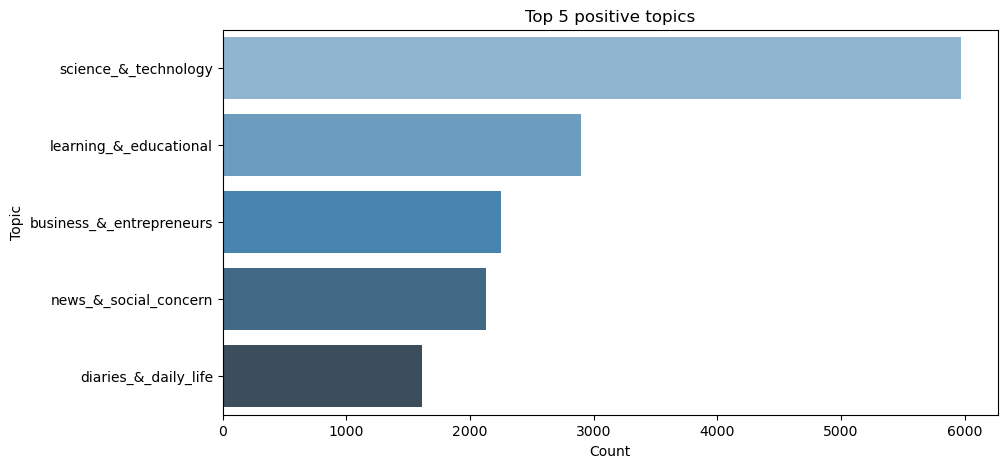

In [9]:
# plot top 5 positive topics as horizontal bar chart
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.barplot(x='count', y='topic', data=topic_pos_f[:5], palette='Blues_d')
plt.title('Top 5 positive topics')
plt.xlabel('Count')
plt.ylabel('Topic')
plt.show()


In [10]:
import pandas as pd
topic_neg_f = pd.read_csv('/Users/barbararuvolo/Desktop/EPFL/Digital Musicology/computational-social-media/datasets/negative_topic.csv', usecols=['topic', 'count'])

In [14]:
topic_neg_f[-5:]

,topic,count
14,learning_&_educational,1406
15,business_&_entrepreneurs,1878
16,news_&_social_concern,2164
17,diaries_&_daily_life,2759
18,science_&_technology,3898


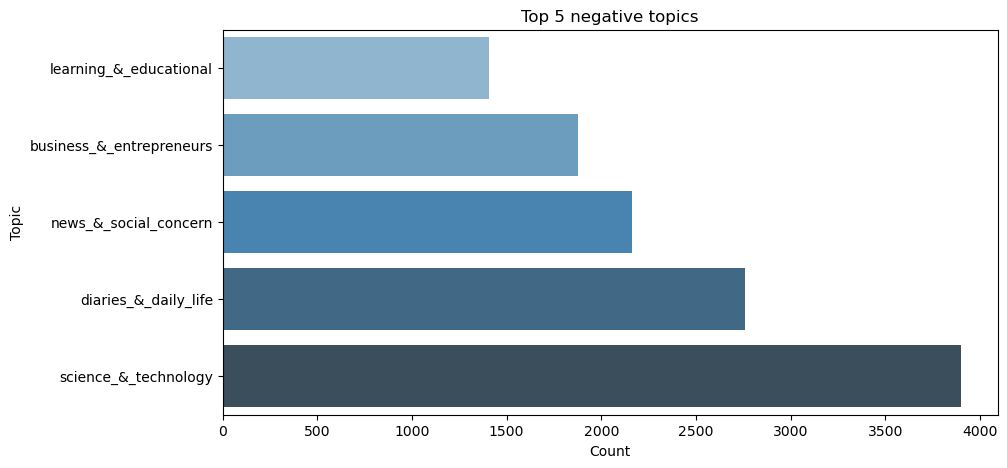

In [15]:
# plot top 5 positive topics as horizontal bar chart
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.barplot(x='count', y='topic', data=topic_neg_f[-5:], palette='Blues_d')
plt.title('Top 5 negative topics')
plt.xlabel('Count')
plt.ylabel('Topic')
plt.show()

### Last two monthes

In [18]:
positive = last[last.label == 'positive']
negative = last[last.label == 'negative']

In [21]:
from collections import Counter

# topic modelling for positive tweets
print("positive tweets topic modelling : ")
text = list(positiv.tweets)
classes = get_topic(text)

string_counts = Counter(classes)

lmap_pos = {}
for string, count in string_counts.items():
    lmap_pos[string] = count
    print(f"Class: {string}, Count: {count}")

sorted_lpos = sorted(lmap_pos.items(), key=lambda x: x[1])

positive tweets topic modelling : 
Class: news_&_social_concern, Count: 6035
Class: science_&_technology, Count: 13491
Class: music, Count: 394
Class: diaries_&_daily_life, Count: 1716
Class: business_&_entrepreneurs, Count: 10655
Class: relationships, Count: 137
Class: travel_&_adventure, Count: 244
Class: film_tv_&_video, Count: 1233
Class: learning_&_educational, Count: 4426
Class: gaming, Count: 342
Class: celebrity_&_pop_culture, Count: 371
Class: fashion_&_style, Count: 95
Class: food_&_dining, Count: 213
Class: fitness_&_health, Count: 470
Class: youth_&_student_life, Count: 1388
Class: other_hobbies, Count: 349
Class: arts_&_culture, Count: 1000
Class: sports, Count: 331
Class: family, Count: 49


In [25]:
sorted_lpos

[('family', 49),
 ('fashion_&_style', 95),
 ('relationships', 137),
 ('food_&_dining', 213),
 ('travel_&_adventure', 244),
 ('sports', 331),
 ('gaming', 342),
 ('other_hobbies', 349),
 ('celebrity_&_pop_culture', 371),
 ('music', 394),
 ('fitness_&_health', 470),
 ('arts_&_culture', 1000),
 ('film_tv_&_video', 1233),
 ('youth_&_student_life', 1388),
 ('diaries_&_daily_life', 1716),
 ('learning_&_educational', 4426),
 ('news_&_social_concern', 6035),
 ('business_&_entrepreneurs', 10655),
 ('science_&_technology', 13491)]

In [26]:
# topic modelling for negative tweets
print("negative tweets topic modelling : ")
text = list(negativ.tweets)
classes = get_topic(text)

string_counts = Counter(classes)

lmap_neg = {}
for string, count in string_counts.items():
    lmap_neg[string] = count
    print(f"Class: {string}, Count: {count}")

sorted_lneg = sorted(lmap_neg.items(), key=lambda x: x[1])

negative tweets topic modelling : 
Class: diaries_&_daily_life, Count: 2269
Class: relationships, Count: 228
Class: science_&_technology, Count: 7499
Class: news_&_social_concern, Count: 3729
Class: other_hobbies, Count: 461
Class: learning_&_educational, Count: 3186
Class: youth_&_student_life, Count: 775
Class: film_tv_&_video, Count: 1341
Class: business_&_entrepreneurs, Count: 6646
Class: fitness_&_health, Count: 290
Class: sports, Count: 306
Class: celebrity_&_pop_culture, Count: 506
Class: travel_&_adventure, Count: 247
Class: gaming, Count: 345
Class: music, Count: 285
Class: arts_&_culture, Count: 857
Class: fashion_&_style, Count: 93
Class: food_&_dining, Count: 212
Class: family, Count: 50


In [27]:
sorted_lneg

[('family', 50),
 ('fashion_&_style', 93),
 ('food_&_dining', 212),
 ('relationships', 228),
 ('travel_&_adventure', 247),
 ('music', 285),
 ('fitness_&_health', 290),
 ('sports', 306),
 ('gaming', 345),
 ('other_hobbies', 461),
 ('celebrity_&_pop_culture', 506),
 ('youth_&_student_life', 775),
 ('arts_&_culture', 857),
 ('film_tv_&_video', 1341),
 ('diaries_&_daily_life', 2269),
 ('learning_&_educational', 3186),
 ('news_&_social_concern', 3729),
 ('business_&_entrepreneurs', 6646),
 ('science_&_technology', 7499)]